In [170]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

In [172]:
gdp = pd.read_csv('all_data.csv')
print(gdp.head())

  Country  Year  Life expectancy at birth (years)            GDP
0   Chile  2000                             77.30 77860932152.00
1   Chile  2001                             77.30 70979923960.00
2   Chile  2002                             77.80 69736811435.00
3   Chile  2003                             77.90 75643459840.00
4   Chile  2004                             78.00 99210392858.00


**Observing data:**

In [175]:
print(f"Countries in this data are: {gdp.Country.unique()}")
print(f"Period of observing by years is: {gdp.Year.unique()}")

Countries in this data are: ['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']
Period of observing by years is: [2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]


**Average life expectancy is meaningful for answering a lot of questions**

In [178]:
mean_le = gdp.groupby('Country')['Life expectancy at birth (years)'].mean().round(2)
mean_le_sort = mean_le.sort_values(ascending=True)
print(mean_le_sort)

Country
Zimbabwe                   50.09
China                      74.26
Mexico                     75.72
United States of America   78.06
Chile                      78.94
Germany                    79.66
Name: Life expectancy at birth (years), dtype: float64


**Average GDP is meaningful for answering a lot of questions**

In [181]:
pd.set_option('display.float_format', lambda x: f'{x:.2f}')
mean_gdp = gdp.groupby('Country')['GDP'].mean()
mean_gdp_round = mean_gdp.round(2)
mean_gdp_sort = mean_gdp_round.sort_values(ascending=True)
print(mean_gdp_sort)

Country
Zimbabwe                       9062579595.06
Chile                        169788845015.31
Mexico                       976650625000.00
Germany                     3094775625000.00
China                       4957713750000.00
United States of America   14075000000000.00
Name: GDP, dtype: float64


**Amount of rows for each country**

In [184]:
print(gdp.groupby('Country').size())

Country
Chile                       16
China                       16
Germany                     16
Mexico                      16
United States of America    16
Zimbabwe                    16
dtype: int64


In [189]:
gdp.rename(columns={'Life expectancy at birth (years)': 'LEABY'}, inplace = True)
gdp.head()

,Country,Year,LEABY,GDP
0,Chile,2000,77.30,77860932152.00
1,Chile,2001,77.30,70979923960.00
2,Chile,2002,77.80,69736811435.00
3,Chile,2003,77.90,75643459840.00
4,Chile,2004,78.00,99210392858.00


**Bar chart (Country with average GDP)**

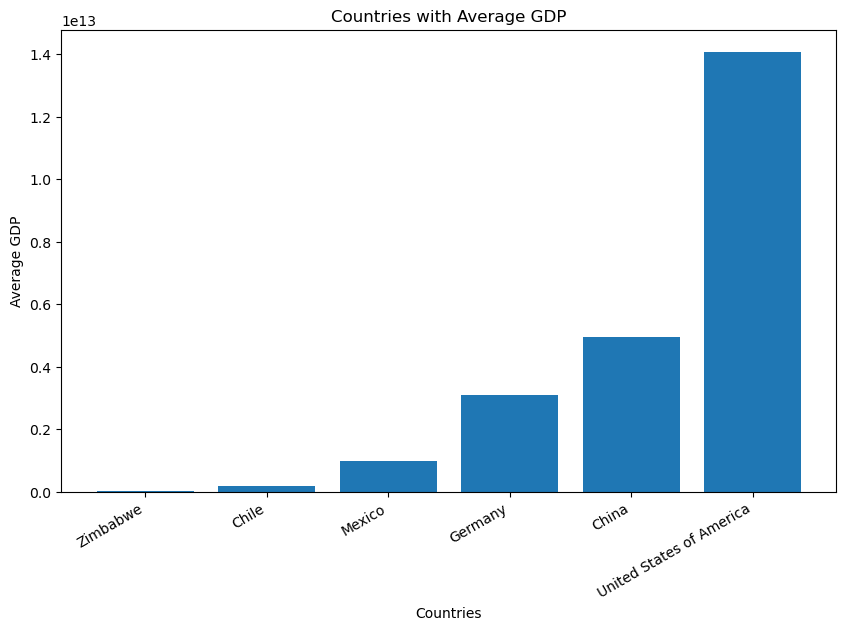

<Figure size 640x480 with 0 Axes>

In [192]:
plt.figure(figsize=(10, 6))
plt.bar(mean_gdp_sort.index, mean_gdp_sort.values)
plt.xlabel('Countries')
plt.ylabel('Average GDP')
plt.xticks(rotation=30, ha='right')
plt.title('Countries with Average GDP')
plt.show()
plt.clf()

**Bar chart (Country with average LE)**

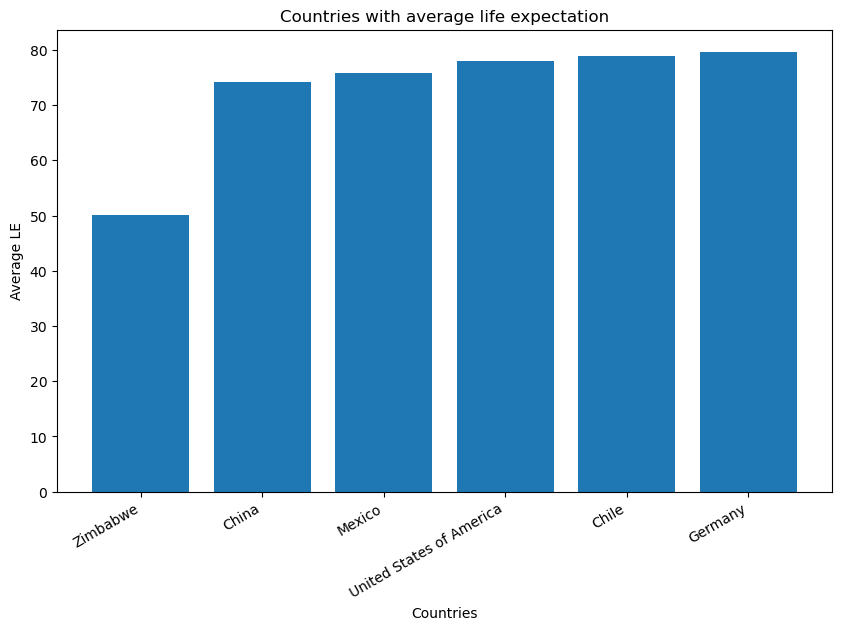

In [195]:
plt.figure(figsize=(10, 6))
plt.bar(mean_le_sort.index, mean_le_sort.values)
plt.xlabel('Countries')
plt.ylabel('Average LE')
plt.xticks(rotation=30, ha='right')
plt.title('Countries with average life expectation')
plt.show()

**Comparison the GDPs of the countries over time**

Text(0.5, 1.0, 'Comparison the GDPs of the countries over time')

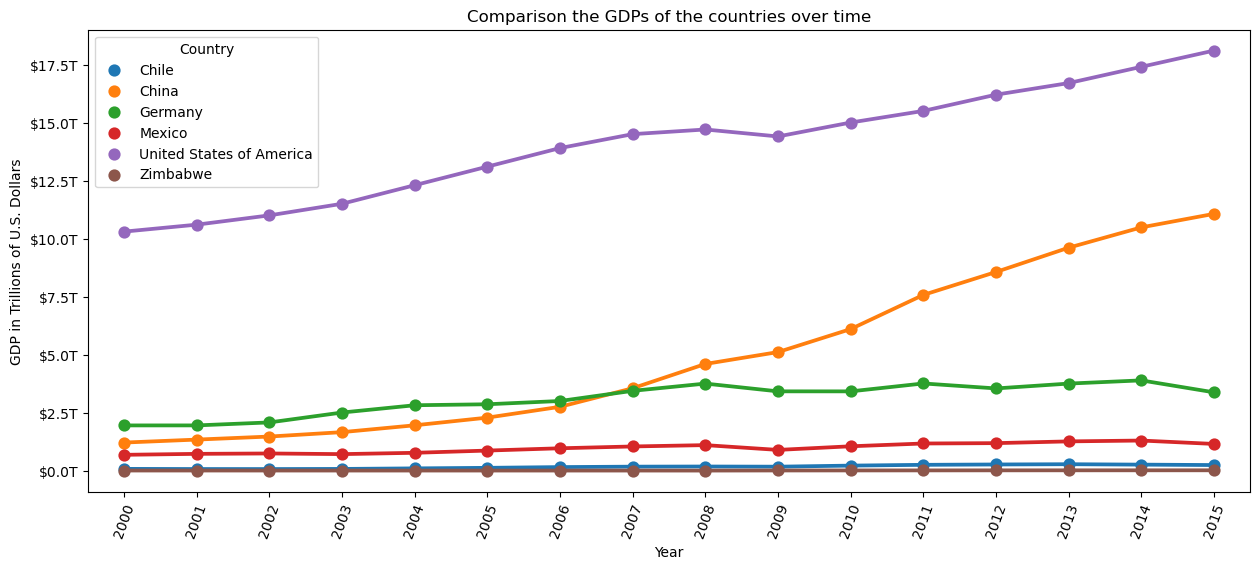

In [198]:
from matplotlib.ticker import FuncFormatter
def trillions(x, pos):
    'The two args are the value and tick position'
    return '$%1.1fT' % (x*1e-12)

formatter = FuncFormatter(trillions)


f, ax = plt.subplots(figsize=(15, 6)) 
ax = sns.pointplot(x="Year", y="GDP", hue = "Country", data=gdp)
plt.xticks(rotation=70)
ax.yaxis.set_major_formatter(formatter)
ax.set(ylabel="GDP in Trillions of U.S. Dollars")
plt.title('Comparison the GDPs of the countries over time')

[Text(0, 0.5, 'Life expectancy at birth (years)')]

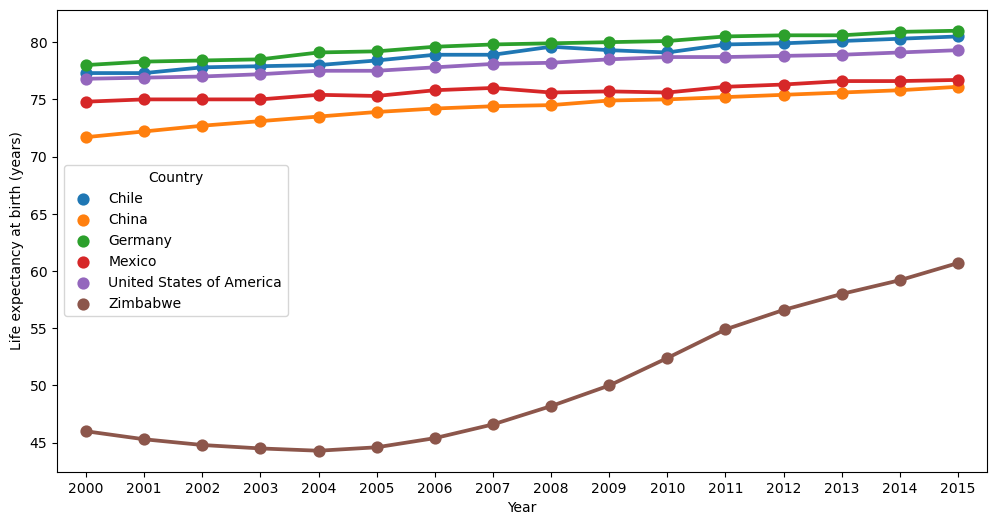

In [200]:
f, ax = plt.subplots(figsize=(12, 6))
ax = sns.pointplot(x="Year", y="LEABY", hue = "Country", data=gdp)
ax.set(ylabel="Life expectancy at birth (years)")

Text(0.5, 1.0, 'Life Expectancy In Years Over Time')

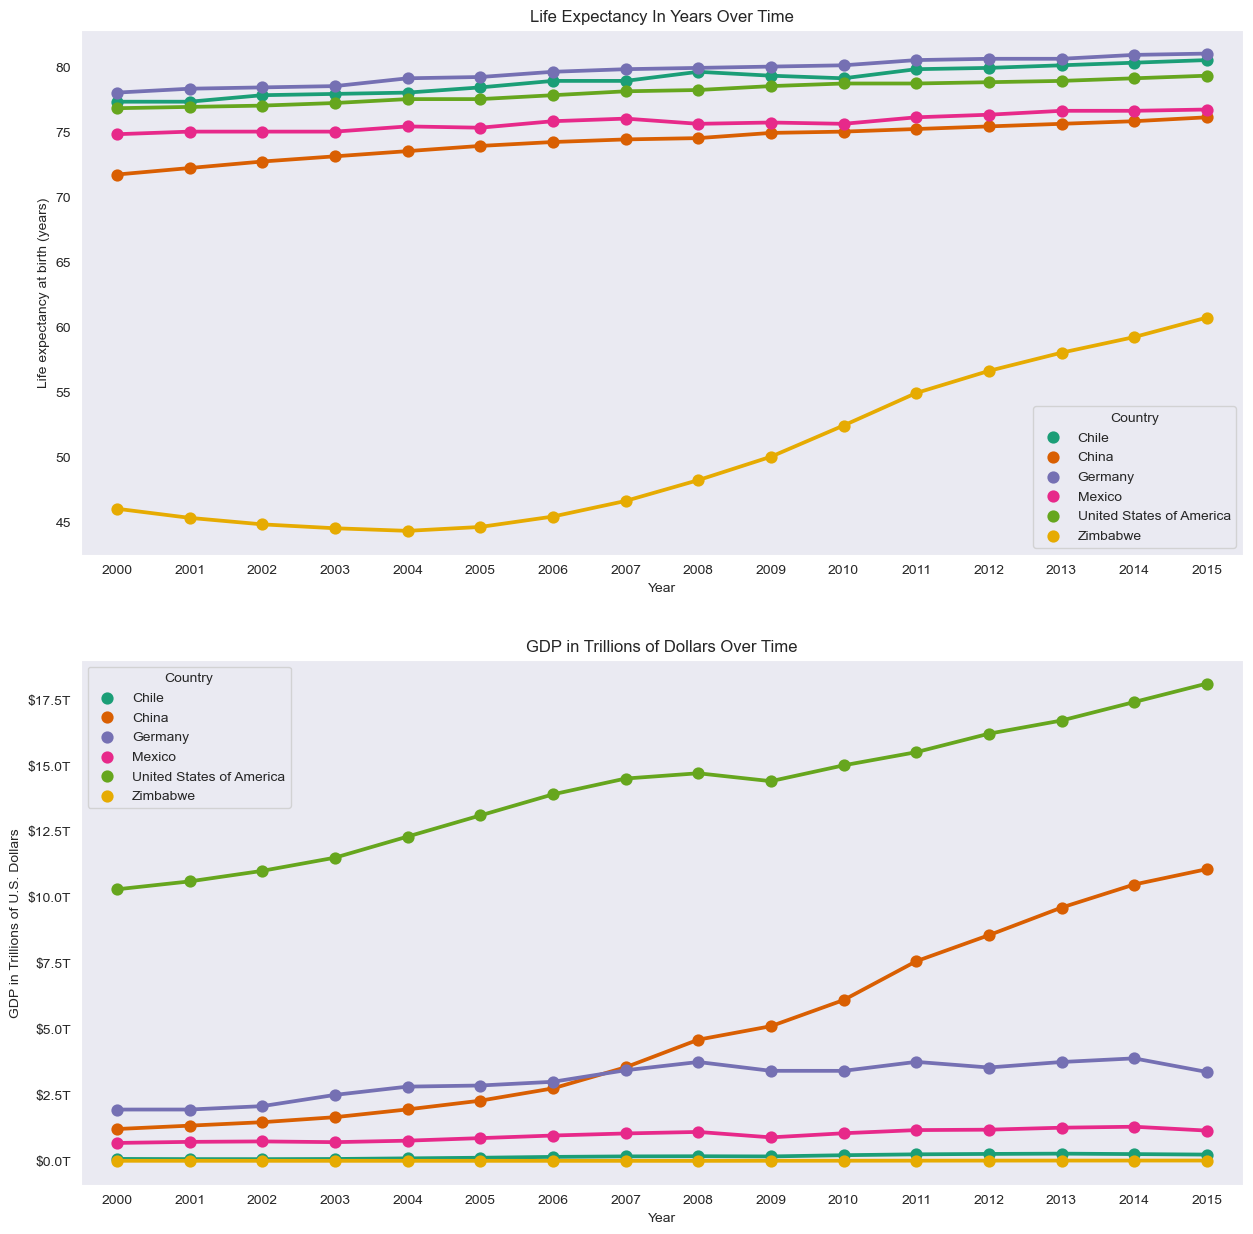

In [204]:
from matplotlib.ticker import FuncFormatter
def trillions(x, pos):
    'The two args are the value and tick position'
    return '$%1.1fT' % (x*1e-12)

formatter = FuncFormatter(trillions)

sns.set_style("dark")
f, (ax1, ax2) = plt.subplots(2,1,figsize=(15, 15) )
sns.set_palette("Dark2")
ax1 = sns.pointplot(x="Year", y="LEABY", hue = "Country", data=gdp, ax=ax1)
ax2 = sns.pointplot(x="Year", y="GDP", hue = "Country", data=gdp, ax=ax2)
ax2.yaxis.set_major_formatter(formatter)
ax1.set(ylabel="Life expectancy at birth (years)")
ax2.set(ylabel="GDP in Trillions of U.S. Dollars")
ax2.set_title("GDP in Trillions of Dollars Over Time")
ax1.set_title("Life Expectancy In Years Over Time")


**Conclusion: сountries with low GDP can have high life expectancy. Therefore, it is assumed that GDP does not directly affect life expectancy. However, GDP can indirectly characterize other important factors, such as the ability of countries to "produce" qualified personnel in medicine and the availability of medical services to the population.